In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/YOLOv8_Final_Proj/mask/archive.zip" -d "/content/"


In [3]:
# installing package to work with yolov8
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.3/166.8 GB disk)


In [4]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/train/train/images/5e353e347af50726986e84c0.jpeg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))

# Image shape in validation
image = cv2.imread('/content/valid/valid/images/maksssksksss103.png')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 667, 1000
shape of the validation image 300, 400


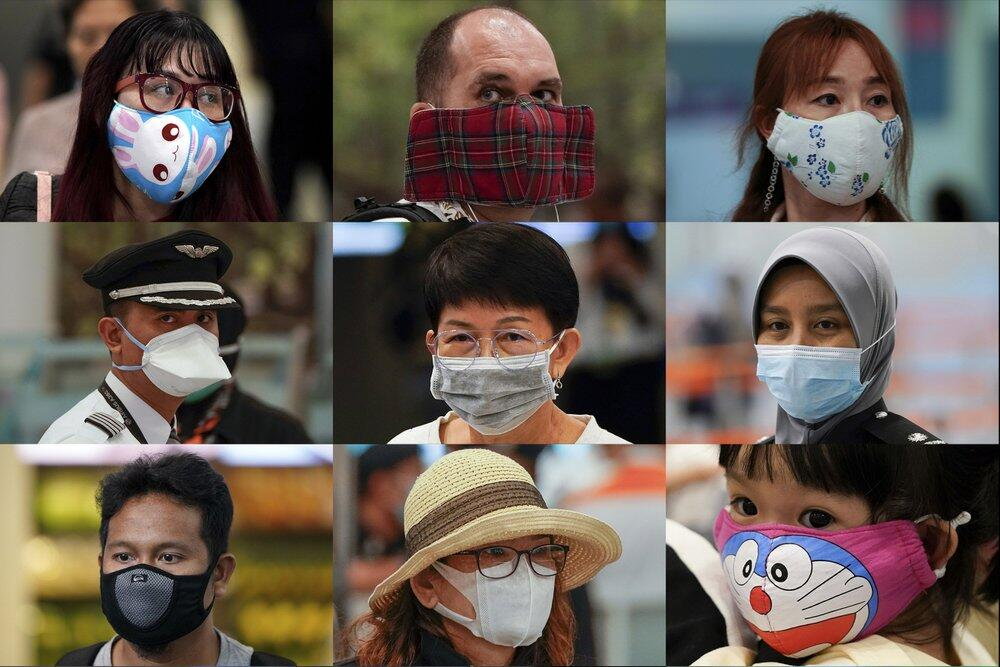

In [5]:
# dispying with different width
from IPython.display import Image 
Image(filename='/content/train/train/images/5e353e347af50726986e84c0.jpeg', width=300) 

In [6]:
#To modify yam file,writetemplate function needs to be called.
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))


In [7]:
# I will write the contents of the cell to a file
%%writefile /content/face_mask_detection.yaml 

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/ # dataset root dir
train: train/train/images/ # train images (relative to 'path')
val: valid/valid/images/ # val images (relative to 'path')
test: test/test/images/ # test images (optional)

# number of classes
nc: 3

# class names
#names: ['0', '1', '2']
names: [ 'no_mask', 'mask','improper_mask']  # class names

Writing /content/face_mask_detection.yaml


In [ ]:
# from google.colab import files
# files.download('/content/runs/detect/train/weights/best.pt')

In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8x.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/face_mask_detection.yaml", epochs=25, imgsz=640,batch=8)  

100%|██████████| 131M/131M [00:05<00:00, 24.2MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/face_mask_detection.yaml, epochs=25, patience=50, batch=8, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

KeyboardInterrupt: ignored

In [ ]:
results = model.val()  # evaluate model performance on the validation set

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png') 
y = Image(filename='runs/detect/train/PR_curve.png') 
z = Image(filename='runs/detect/train/confusion_matrix.png') 
display(x, y,z)

In [ ]:
# loading the trianed model
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model

In [9]:
# testing the model on a video
# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4") 

#---------------解決跑出NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968--------------------
import locale
locale.getpreferredencoding = lambda: "UTF-8"
#--------------------------------------------------------------------------

!yolo task=detect mode=predict model="/content/best_yolov8x.pt" source="/content/test/test/images" save=True

2023-05-29 14:29:15.484666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 14:29:16.304181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs
image 1/141 /content/test/test/images/NUZZHAB7IMI6VHQQW44IVOMBHU.jpg: 448x640 1 no_mask, 1 mask, 69.7ms
image 2/141 /content/test/test/images/OIP7vZHgEGheRWy-R6I19P3TQHaE8.jpg: 448x640 4 no_masks, 60.1ms
image 3/141 /content/test/test/images/P0000100005637_3_37742.jpg: 640x640 1 mask, 78.2ms
image 4/141 /content/test/test/images/PA-49784209-1024x684.jpg: 448x640 1 mask, 44.1ms
image 5/141 /co

In [10]:
#save result in google drive
import os
folder_path = '/content/runs/detect/predict'
target_path = '/content/drive/MyDrive/0529py/yolov8x'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
      image_path = os.path.join(folder_path, filename)
      image = cv2.imread(image_path)
      output_path = os.path.join(target_path, filename)
      cv2.imwrite(output_path, image)

In [ ]:
!yolo task=detect mode=predict model="/content/m_best.pt" source="/content/TEST1.mp4" save=True

2023-05-27 05:04:00.706676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 146, in predict
    return self.predictor(source=source, stream=stream, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return fu

### ?開啟鏡頭?

In [ ]:
!pip install opencv-python


In [ ]:
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("無法開啟鏡頭。")
else:
    print("鏡頭已成功開啟。")

cap.release()


In [ ]:
!apt-get update
!apt-get install -y libsm6 libxext6 libxrender-dev

import cv2
from google.colab import output

try:
    cap = cv2.VideoCapture(0)
    cap.release()
    output.clear()
    print("鏡頭許可權已設定正確。")
except Exception as e:
    print("無法設定鏡頭許可權：", str(e))


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# # start streaming video from webcam
# video_stream()
# # label for video
# label_html = 'Capturing...'
# # initialze bounding box to empty
# bbox = ''
# count = 0 
# while True:
#     js_reply = video_frame(label_html, bbox)
#     if not js_reply:
#         break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480,640,4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     # get face region coordinates
#     faces = face_cascade.detectMultiScale(gray)
#     # get face bounding box for overlay
#     for (x,y,w,h) in faces:
#       bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

#     bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)
#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes

In [ ]:
!pip install supervision==0.2.1